In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.layers import SimpleRNN
from keras.models import Sequential
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=20, activation='relu', input_shape=(10,5)))

print(model_rnn.summary())

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 20)                520       
                                                                 
Total params: 520
Trainable params: 520
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
from platform import python_version

print(python_version())

3.9.12


In [8]:
tensorflow.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [18]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 21s 0us/step


In [19]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255
y_train_encoded = keras.utils.to_categorical(y_train, num_classes = 10, dtype = 'float32')
y_test_encoded = keras.utils.to_categorical(y_test, num_classes = 10, dtype = 'float32')

In [21]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])
    model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [22]:
%%timeit -n1 -r1
# CPU
with tf.device('/CPU:0'):
    model_cpu = get_model()
    model_cpu.fit(X_train_scaled, y_train_encoded, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.8132 - accuracy: 0.3551
Epoch 2/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.6238 - accuracy: 0.4288
Epoch 3/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5413 - accuracy: 0.4555
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 1.4837 - accuracy: 0.4794
Epoch 5/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.4334 - accuracy: 0.4980
Epoch 6/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.3898 - accuracy: 0.5116
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.3514 - accuracy: 0.5245
Epoch 8/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.3173 - accuracy: 0.5365
Epoch 9/10
1563/1563 [==============================] - 18s 12ms/step - loss: 1.2855 - accuracy: 0.5487
Epoch 10/10
1563/1563 [==============================] - 19s 12m

In [24]:
%%timeit -n1 -r1
# GPU
with tf.device('/GPU:0'):
    model_gpu = get_model()
    model_gpu.fit(X_train_scaled, y_train_encoded, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.8109 - accuracy: 0.3549
Epoch 2/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.6215 - accuracy: 0.4273
Epoch 3/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.5403 - accuracy: 0.4574
Epoch 4/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4814 - accuracy: 0.4774
Epoch 5/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.4281 - accuracy: 0.4984
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3892 - accuracy: 0.5117
Epoch 7/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3490 - accuracy: 0.5265
Epoch 8/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.3147 - accuracy: 0.5368
Epoch 9/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2816 - accuracy: 0.5513
Epoch 10/10
1563/1563 [==============================] - 14s 9ms/step - l

In [26]:
import timeit
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
0.632617707999998
GPU (s):
0.12009491599928879
GPU speedup over CPU: 5x


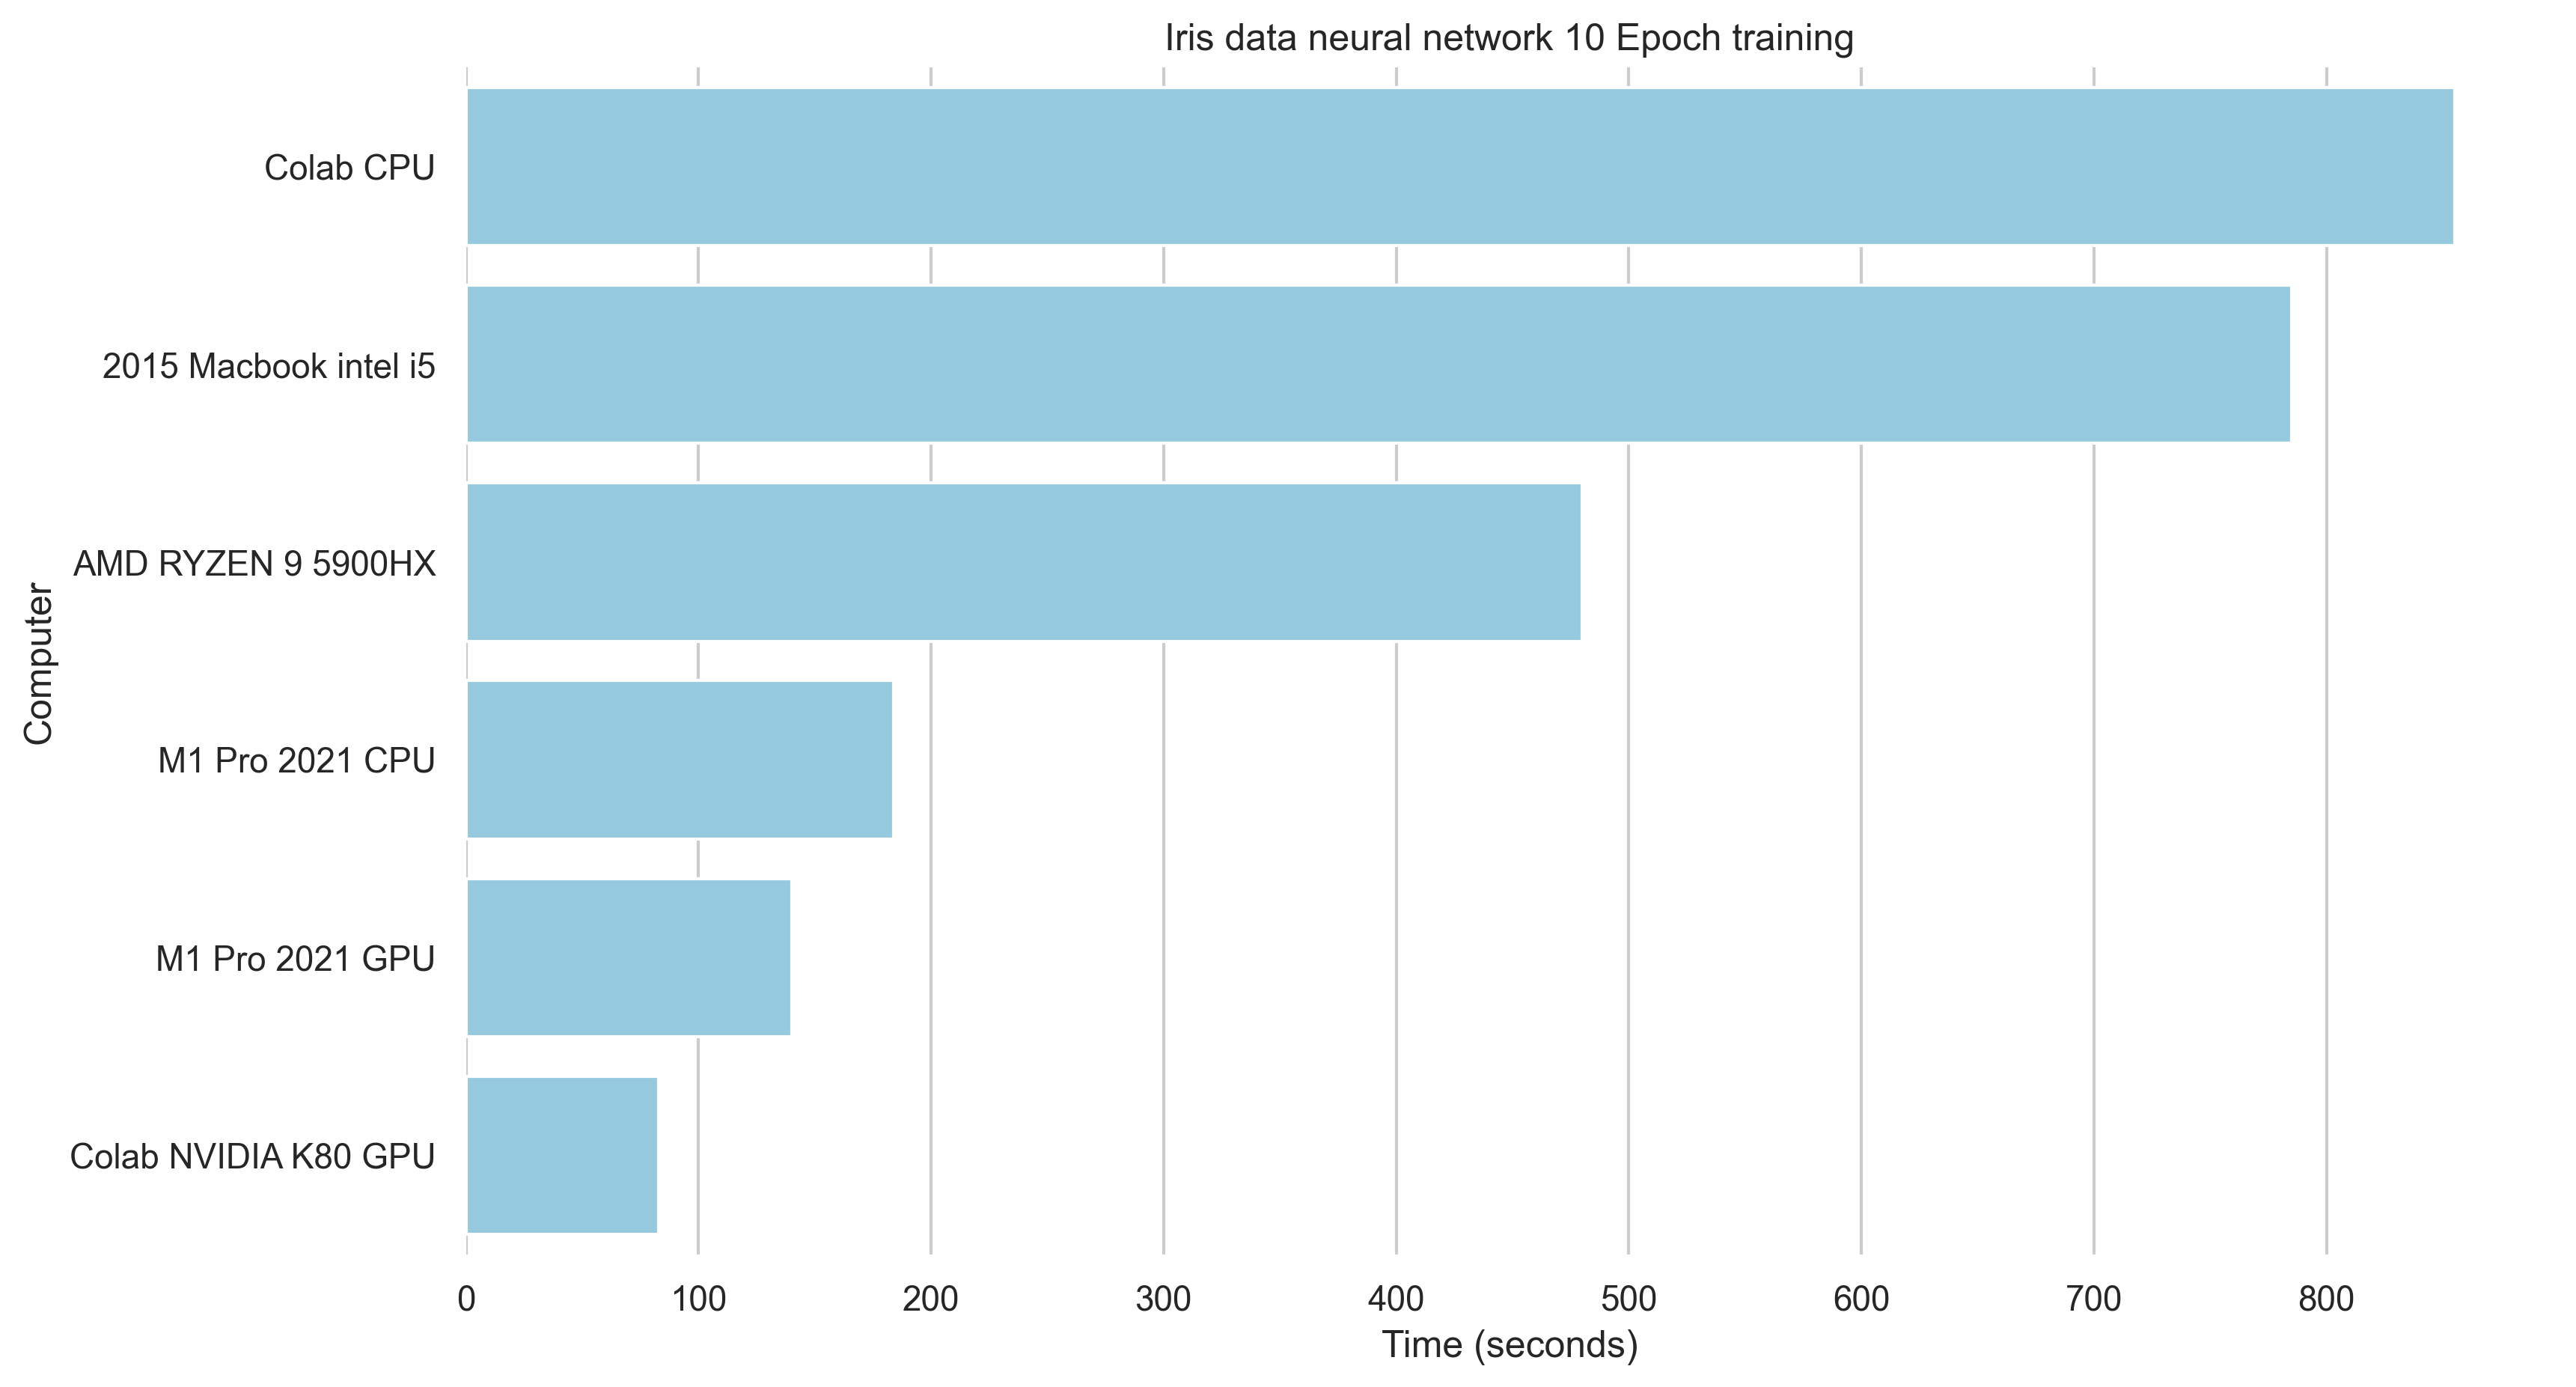

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
my_dict = {'M1 Pro 2021 CPU': [184], 'M1 Pro 2021 GPU': [140], 'Colab CPU': [855],
           'Colab NVIDIA K80 GPU': [83],
          '2015 Macbook intel i5': [785],'AMD RYZEN 9 5900HX':[480]}

training = pd.DataFrame.from_dict(my_dict)
training

df=pd.melt(training)
df = df.sort_values(by=['value'],ascending=False)
f, ax = plt.subplots(figsize=(12,7))
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")

ax = sns.barplot(y=df.variable, x=df.value, data=df,color='skyblue',)
ax.set(xlabel='Time (seconds)', ylabel='Computer',title='Iris data neural network 10 Epoch training')
sns.despine(left=True, bottom=True)


